In [18]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [19]:
btc = pdr.get_data_yahoo('BTC-USD', start= '2018-1-1')
day = np.arange(1, len(btc) + 1)
btc['day'] = day
btc.drop(columns=['Adj Close','Volume'], inplace = True)
btc = btc[['day', 'Open','High','Low','Close']]
btc.head()

,day,Open,High,Low,Close
Date,,,,,
2018-01-01,1,14112.200195,14112.200195,13154.700195,13657.200195
2018-01-02,2,13625.000000,15444.599609,13163.599609,14982.099609
2018-01-03,3,14978.200195,15572.799805,14844.500000,15201.000000
2018-01-04,4,15270.700195,15739.700195,14522.200195,15599.200195
2018-01-05,5,15477.200195,17705.199219,15202.799805,17429.500000


In [28]:
btc['9-day'] = btc['Close'].rolling(9).mean()
btc['21-day'] = btc['Close'].rolling(21).mean()
btc[19:25]

,day,Open,High,Low,Close,9-day,21-day,signal,Return,system_return,entry,system return
Date,,,,,,,,,,,,
2018-02-10,41,8720.080078,9122.549805,8295.469727,8621.900391,8248.634494,NaN,-1,-0.013259,0.013259,0.0,0.013259
2018-02-11,42,8616.129883,8616.129883,7931.100098,8129.970215,8170.770074,9618.048689,-1,-0.058748,0.058748,0.0,0.058748
2018-02-12,43,8141.430176,8985.919922,8141.430176,8926.570312,8143.176758,9522.580590,-1,0.093475,-0.093475,0.0,-0.093475
2018-02-13,44,8926.719727,8958.469727,8455.410156,8598.309570,8178.876736,9414.481027,-1,-0.037467,0.037467,0.0,0.037467
2018-02-14,45,8599.919922,9518.540039,8599.919922,9494.629883,8461.027832,9325.682431,-1,0.099161,-0.099161,0.0,-0.099161
2018-02-15,46,9488.320312,10234.799805,9395.580078,10166.400391,8729.072320,9273.634812,-1,0.068362,-0.068362,0.0,-0.068362


In [29]:
btc['signal'] = np.where(btc['9-day'] > btc['21-day'], 1, 0)
btc['signal'] = np.where(btc['9-day'] < btc['21-day'], -1, btc['signal'])
btc.dropna(inplace=True)
btc.head()

,day,Open,High,Low,Close,9-day,21-day,signal,Return,system_return,entry,system return
Date,,,,,,,,,,,,
2018-02-11,42,8616.129883,8616.129883,7931.100098,8129.970215,8170.770074,9618.048689,-1,-0.058748,0.058748,0.0,0.058748
2018-02-12,43,8141.430176,8985.919922,8141.430176,8926.570312,8143.176758,9522.580590,-1,0.093475,-0.093475,0.0,-0.093475
2018-02-13,44,8926.719727,8958.469727,8455.410156,8598.309570,8178.876736,9414.481027,-1,-0.037467,0.037467,0.0,0.037467
2018-02-14,45,8599.919922,9518.540039,8599.919922,9494.629883,8461.027832,9325.682431,-1,0.099161,-0.099161,0.0,-0.099161
2018-02-15,46,9488.320312,10234.799805,9395.580078,10166.400391,8729.072320,9273.634812,-1,0.068362,-0.068362,0.0,-0.068362


In [30]:
btc['Return'] = np.log(btc['Close']).diff()
btc['system_return'] = btc['signal'] * btc['Return']
btc['entry'] = btc.signal.diff()
btc.head()

,day,Open,High,Low,Close,9-day,21-day,signal,Return,system_return,entry,system return
Date,,,,,,,,,,,,
2018-02-11,42,8616.129883,8616.129883,7931.100098,8129.970215,8170.770074,9618.048689,-1,NaN,NaN,NaN,0.058748
2018-02-12,43,8141.430176,8985.919922,8141.430176,8926.570312,8143.176758,9522.580590,-1,0.093475,-0.093475,0.0,-0.093475
2018-02-13,44,8926.719727,8958.469727,8455.410156,8598.309570,8178.876736,9414.481027,-1,-0.037467,0.037467,0.0,0.037467
2018-02-14,45,8599.919922,9518.540039,8599.919922,9494.629883,8461.027832,9325.682431,-1,0.099161,-0.099161,0.0,-0.099161
2018-02-15,46,9488.320312,10234.799805,9395.580078,10166.400391,8729.072320,9273.634812,-1,0.068362,-0.068362,0.0,-0.068362


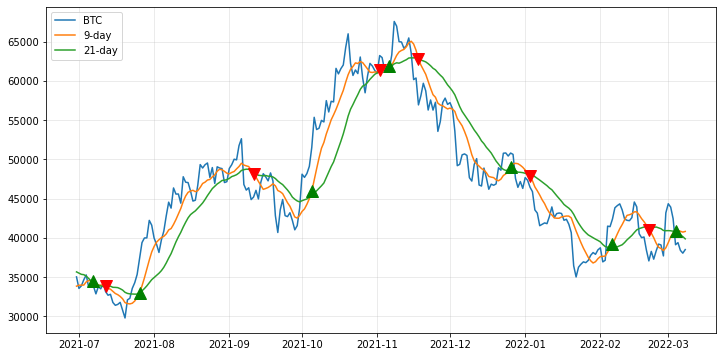

In [31]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(btc.iloc[-252:]['Close'], label = 'BTC')
plt.plot(btc.iloc[-252:]['9-day'], label = '9-day')
plt.plot(btc.iloc[-252:]['21-day'], label = '21-day')
plt.plot(btc[-252:].loc[btc.entry == 2].index, btc[-252:]['9-day'][btc.entry == 2], '^', color = 'g', markersize = 12)
plt.plot(btc[-252:].loc[btc.entry == -2].index, btc[-252:]['9-day'][btc.entry == -2], 'v', color = 'r', markersize = 12)
plt.legend(loc=2);

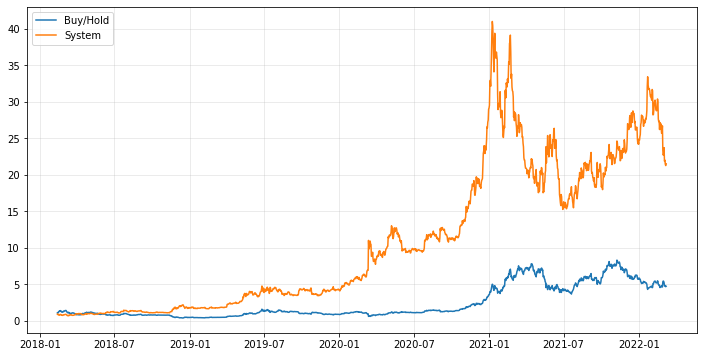

In [32]:
btc['system return'] = btc.signal * btc.Return
plt.plot(np.exp(btc.Return).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(btc.system_return).cumprod(), label = 'System')
plt.grid(True, alpha = .3)
plt.legend(loc=2);

In [33]:
np.exp(btc['Return']).cumprod()[-1] -1

3.737525044025081

In [34]:
np.exp(btc['system_return']).cumprod()[-1] -1

20.503223324588923